<a href="https://colab.research.google.com/github/carosen003/Big-Data/blob/main/TP_Big_data_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocesamiento de Datos: Limpien y preparen los datos de canciones y escuchas para el análisis.**
Excel en crudo

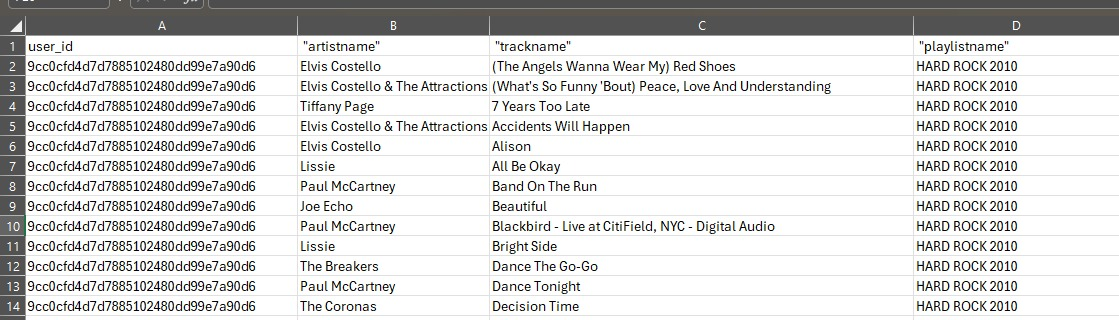



Excel Luego de la limpieza
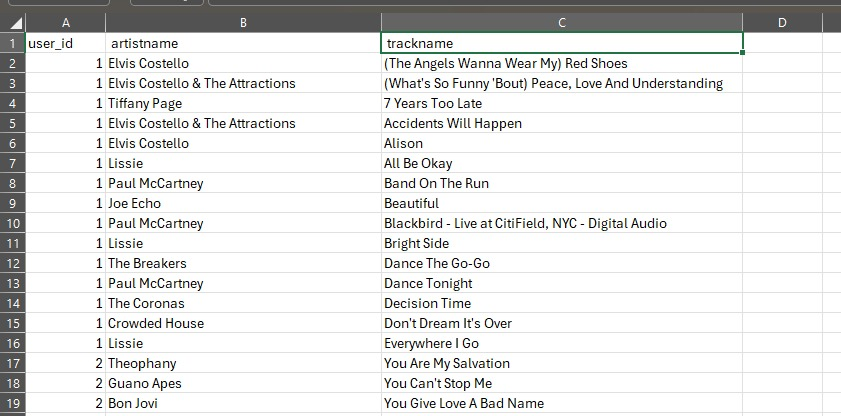

# **Exploración de Datos (EDA): Analicen las características de las canciones, como género, artista, popularidad, duración, etc.**

In [2]:
pip install retrying


In [1]:
pip install plotly dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 44.6 MB/s eta 0:00:00


In [3]:
pip install requests spotipy pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 8.9 MB/s eta 0:00:00


In [4]:
pip install requests


In [5]:
!pip install spotipy


In [6]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [7]:
import pandas as pd

In [8]:
# Credenciales de la aplicación de Spotify
client_id = '451aa62bae54460285deb9a8a0921675'
client_secret = '4c31e871561a4aaeabf7e2c183504e47'

# Autenticación
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Ejemplo: Obtener detalles de una canción específica
track_id = '297Ev6aeDHc8dECDmK7SFH'
track = sp.track(track_id)
print(track)

{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5YCc6xS5Gpj3EkaYGdjyNK'}, 'href': 'https://api.spotify.com/v1/artists/5YCc6xS5Gpj3EkaYGdjyNK', 'id': '5YCc6xS5Gpj3EkaYGdjyNK', 'name': 'WOS', 'type': 'artist', 'uri': 'spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', 'CV', 'CW', 'DM',

In [31]:
# Credenciales de la aplicación de Spotify
client_id = '451aa62bae54460285deb9a8a0921675'
client_secret = '4c31e871561a4aaeabf7e2c183504e47'

# Autenticación
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def print_track_details(track_name):
    # Buscar la canción por nombre
    results = sp.search(q=f'track:{track_name}', type='track', limit=1)
    tracks = results['tracks']['items']

    if not tracks:
        print(f"No se encontró ninguna canción con el nombre: {track_name}")
        return

    # Obtener el primer resultado
    track = tracks[0]

    # Imprimir los detalles de la canción en forma vertical
    print("Detalles de la canción:")
    print(f"Nombre: {track['name']}")
    print(f"Álbum: {track['album']['name']}")
    print(f"Artistas: {', '.join([artist['name'] for artist in track['artists']])}")
    print(f"ID de la canción: {track['id']}")
    print(f"Duración (ms): {track['duration_ms']}")
    print(f"Popularidad: {track['popularity']}")
    print(f"Vista previa de la URL: {track['preview_url']}")
    print(f"URL de Spotify: {track['external_urls']['spotify']}")

# Ejemplo de uso
track_name = 'Shape of You'
print_track_details(track_name)

Detalles de la canción:
Nombre: Shape of You
Álbum: ÷ (Deluxe)
Artistas: Ed Sheeran
ID de la canción: 7qiZfU4dY1lWllzX7mPBI3
Duración (ms): 233712
Popularidad: 80
Vista previa de la URL: https://p.scdn.co/mp3-preview/7339548839a263fd721d01eb3364a848cad16fa7?cid=451aa62bae54460285deb9a8a0921675
URL de Spotify: https://open.spotify.com/track/7qiZfU4dY1lWllzX7mPBI3


In [9]:
df = pd.read_csv('/content/spotify_dataset.csv')
print(df.head())

   user_id                        artistname  \
0        1                    Elvis Costello   
1        1  Elvis Costello & The Attractions   
2        1                      Tiffany Page   
3        1  Elvis Costello & The Attractions   
4        1                    Elvis Costello   

                                           song_name  
0               (The Angels Wanna Wear My) Red Shoes  
1  (What's So Funny 'Bout) Peace, Love And Unders...  
2                                   7 Years Too Late  
3                              Accidents Will Happen  
4                                             Alison  


In [10]:
df.head()

,user_id,artistname,song_name
0,1,Elvis Costello,(The Angels Wanna Wear My) Red Shoes
1,1,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders..."
2,1,Tiffany Page,7 Years Too Late
3,1,Elvis Costello & The Attractions,Accidents Will Happen
4,1,Elvis Costello,Alison


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      270 non-null    int64 
 1    artistname  270 non-null    object
 2    song_name   270 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.5+ KB


In [12]:
df.shape

(270, 3)

In [13]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Tus credenciales de la aplicación de Spotify
client_id = '451aa62bae54460285deb9a8a0921675'
client_secret = '4c31e871561a4aaeabf7e2c183504e47'

# Autenticación
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))


In [14]:
df.columns = df.columns.str.strip()

In [16]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Tus credenciales de la aplicación de Spotify
client_id = '451aa62bae54460285deb9a8a0921675'
client_secret = '4c31e871561a4aaeabf7e2c183504e47'

# Autenticación
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Definir una función para obtener la información de una canción
def get_song_info(song_name):
    results = sp.search(q=song_name, limit=1)
    if results['tracks']['items']:
        track = results['tracks']['items'][0]
        artist_id = track['artists'][0]['id']
        artist_info = sp.artist(artist_id)
        genres = artist_info['genres'] if artist_info['genres'] else ['Not Available']

        album_id = track['album']['id']
        album_info = sp.album(album_id)
        album_name = album_info['name']
        album_release_date = album_info['release_date']

        duration_ms = track['duration_ms']
        minutes = duration_ms // 60000
        seconds = (duration_ms % 60000) // 1000
        duration_formatted = f"{minutes} min {seconds} s"

        song_info = {
            'song_name': track['name'],
            'artist': track['artists'][0]['name'],
            'genre': ', '.join(genres),
            'popularity': track['popularity'],
            'album_name': album_name,
            'album_release_date': album_release_date,
            'duration': duration_formatted
        }
        return song_info
    else:
        return None



In [18]:
# Obtener información de todas las canciones en el DataFrame
column_name = 'song_name'
df.columns = df.columns.str.strip()
song_infos = [get_song_info(song) for song in df[column_name]]

# Filtrar los valores None
song_infos = [info for info in song_infos if info is not None]

# Convertir a DataFrame para análisis
song_info_df = pd.DataFrame(song_infos)
print(song_info_df.head())


                                           song_name  \
0               (The Angels Wanna Wear My) Red Shoes   
1  (What's So Funny 'Bout) Peace, Love And Unders...   
2                                             Take 7   
3                              Accidents Will Happen   
4                                             Alison   

                             artist  \
0                    Elvis Costello   
1  Elvis Costello & The Attractions   
2                 10 Years Too Late   
3  Elvis Costello & The Attractions   
4                          Slowdive   

                                               genre  popularity  \
0  new wave, new wave pop, permanent wave, power ...          32   
1  art rock, new romantic, new wave, new wave pop...          35   
2                                      Not Available           0   
3  art rock, new romantic, new wave, new wave pop...          31   
4  alternative rock, dream pop, reading indie, sh...          56   

                   

In [19]:

# Imprimir la información de las canciones
for index, row in song_info_df.iterrows():
    print(f"Usuario: {df.iloc[index]['user_id']}")
    print(f"Canción: {row['song_name']}")
    print(f"Artista: {row['artist']}")
    print(f"Género: {row['genre']}")
    print(f"Popularidad: {row['popularity']}")
    print(f"Álbum: {row['album_name']}")
    print(f"Fecha de lanzamiento del álbum: {row['album_release_date']}")
    print(f"Duración: {row['duration']} segundos\n")

Usuario: 1
Canción: (The Angels Wanna Wear My) Red Shoes
Artista: Elvis Costello
Género: new wave, new wave pop, permanent wave, power pop, singer-songwriter
Popularidad: 32
Álbum: My Aim Is True
Fecha de lanzamiento del álbum: 1977-07-22
Duración: 2 min 47 s segundos

Usuario: 1
Canción: (What's So Funny 'Bout) Peace, Love And Understanding
Artista: Elvis Costello & The Attractions
Género: art rock, new romantic, new wave, new wave pop, power pop
Popularidad: 35
Álbum: Armed Forces (Super Deluxe Edition)
Fecha de lanzamiento del álbum: 1979-01-05
Duración: 3 min 31 s segundos

Usuario: 1
Canción: Take 7
Artista: 10 Years Too Late
Género: Not Available
Popularidad: 0
Álbum: Sounds from Nowhere
Fecha de lanzamiento del álbum: 2002
Duración: 2 min 50 s segundos

Usuario: 1
Canción: Accidents Will Happen
Artista: Elvis Costello & The Attractions
Género: art rock, new romantic, new wave, new wave pop, power pop
Popularidad: 31
Álbum: Armed Forces (Super Deluxe Edition)
Fecha de lanzamiento

# **Análisis de Preferencias Musicales: Identifiquen patrones en las preferenciasmusicales de los usuarios, como géneros favoritos, artistas populares, tendencias temporales.**

**Funcion por Usuario individual**

In [20]:
#Funcion anterior pero elijiendo el numero de usuario
# Configurar las credenciales de Spotify
client_id = '451aa62bae54460285deb9a8a0921675'
client_secret = '4c31e871561a4aaeabf7e2c183504e47'

# Autenticación
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

def get_song_info(song_name):
    results = sp.search(q=song_name, limit=1)
    if results['tracks']['items']:
        track = results['tracks']['items'][0]
        artist_id = track['artists'][0]['id']
        album_id = track['album']['id']

        # Información del artista
        artist_info = sp.artist(artist_id)
        genres = artist_info['genres'] if artist_info['genres'] else ['Not Available']

        # Información del álbum
        album_info = sp.album(album_id)
        album_name = album_info['name']
        album_release_date = album_info['release_date']

        duration_ms = track['duration_ms']
        minutes = duration_ms // 60000
        seconds = (duration_ms % 60000) // 1000
        duration_formatted = f"{minutes} min {seconds} s"

        song_info = {
            'song_name': track['name'],
            'artist': track['artists'][0]['name'],
            'genre': ', '.join(genres),
            'popularity': track['popularity'],
            'duration': duration_formatted,
            'album_name': album_name,
            'album_release_date': album_release_date
        }
        return song_info
    else:
        return None


In [21]:
#Funcion anterior pero generando un csv
def get_user_song_info(user_id):
    # Cargar el archivo CSV
    df = pd.read_csv('/content/spotify_dataset.csv')

    # Limpiar los nombres de las columnas eliminando espacios iniciales y finales
    df.columns = df.columns.str.strip()

    # Filtrar las canciones por el ID del usuario
    user_songs = df[df['user_id'] == user_id]['song_name']

    # Obtener información de todas las canciones del usuario
    song_infos = [get_song_info(song) for song in user_songs]

    # Filtrar los valores None
    song_infos = [info for info in song_infos if info is not None]

    # Convertir a DataFrame para análisis
    song_info_df = pd.DataFrame(song_infos)

    # Guardar el DataFrame en un archivo CSV
    output_csv = f'/content/song_info_user_{user_id}.csv'
    song_info_df.to_csv(output_csv, index=False)

    return song_info_df, output_csv

def get_favorite_artists_genres(song_info_df):
    artist_counts = song_info_df['artist'].value_counts()
    genre_counts = song_info_df['genre'].str.split(', ').explode().value_counts()
    return artist_counts, genre_counts

In [22]:
#Funcion anterior pero haciendo un print y count de sus gustos favoritos
user_id = 3
#song_info_df, output_csv = get_user_song_info(user_id)
print(f"Información de las canciones del usuario {user_id}  ")

# Contar los artistas y géneros favoritos
favorite_artists, favorite_genres = get_favorite_artists_genres(song_info_df)
print("\nArtistas favoritos:")
print(favorite_artists)
print("\nGéneros favoritos:")
print(favorite_genres)

Información de las canciones del usuario 3  

Artistas favoritos:
artist
Melendi              5
Bruno Mars           5
JAY-Z                4
Justin Timberlake    4
Ed Sheeran           4
                    ..
Junkie Kid           1
Kris Kross           1
Kim Leoni            1
Private Agenda       1
Miki Matsubara       1
Name: count, Length: 214, dtype: int64

Géneros favoritos:
genre
pop                 44
rock                28
hip hop             25
modern rock         20
rap                 19
                    ..
children's music     1
nursery              1
hip pop              1
miami bass           1
classic city pop     1
Name: count, Length: 300, dtype: int64


**Funcion para todos los usuarios**

In [23]:
def get_favorite_artists_genres(song_info_df, user_id):
    artist_counts = song_info_df['artist'].value_counts().reset_index()
    artist_counts.columns = ['name', 'count']
    artist_counts['type'] = 'artist'
    artist_counts['user_id'] = user_id

    genre_counts = song_info_df['genre'].str.split(', ').explode().value_counts().reset_index()
    genre_counts.columns = ['name', 'count']
    genre_counts['type'] = 'genre'
    genre_counts['user_id'] = user_id

    return artist_counts, genre_counts
# Cargar el archivo CSV
df = pd.read_csv('/content/spotify_dataset.csv')
# Limpiar los nombres de las columnas eliminando espacios iniciales y finales
df.columns = df.columns.str.strip()
# Obtener la lista de usuarios únicos
user_ids = df['user_id'].unique()
all_favorites = pd.DataFrame()
# Procesar información para todos los usuarios
for user_id in user_ids:
    song_info_df, _ = get_user_song_info(user_id)  # Fix the line here
    print(f"Información de las canciones del usuario {user_id} procesada.")
    # Contar los artistas y géneros favoritos y guardarlos en el DataFrame consolidado
    favorite_artists, favorite_genres = get_favorite_artists_genres(song_info_df, user_id)
    print("\nArtistas favoritos:")
    print(favorite_artists)
    print("\nGéneros favoritos:")
    print(favorite_genres)

    all_favorites = pd.concat([all_favorites, favorite_artists, favorite_genres], ignore_index=True)

# Guardar todos los artistas y géneros favoritos en un solo archivo CSV
all_favorites.to_csv('/content/all_favorites.csv', index=False)
print("Artistas y géneros favoritos de todos los usuarios guardados en all_favorites.csv.")

Información de las canciones del usuario 1 procesada.

Artistas favoritos:
                                name  count    type  user_id
0   Elvis Costello & The Attractions      2  artist        1
1                     Elvis Costello      1  artist        1
2                  10 Years Too Late      1  artist        1
3                           Slowdive      1  artist        1
4                            Shallou      1  artist        1
5                     Paul McCartney      1  artist        1
6                       Benson Boone      1  artist        1
7                    Sarah McLachlan      1  artist        1
8                       Van Morrison      1  artist        1
9                     Arctic Monkeys      1  artist        1
10                        Lucy Pearl      1  artist        1
11                        Jonah Love      1  artist        1
12                     Crowded House      1  artist        1
13                  Hollywood Undead      1  artist        1

Géneros f

Generar csv de todos los  usuarios

In [ ]:
def get_user_song_info(user_id, df):
    # Filtrar las canciones por el ID del usuario
    user_songs = df[df['user_id'] == user_id]['song_name']

    # Obtener información de todas las canciones del usuario
    song_infos = [get_song_info(song) for song in user_songs]

    # Filtrar los valores None
    song_infos = [info for info in song_infos if info is not None]

    # Convertir a DataFrame para análisis
    song_info_df = pd.DataFrame(song_infos)
    song_info_df['user_id'] = user_id  # Agregar columna de ID de usuario

    return song_info_df


In [ ]:
# Obtener la lista de usuarios únicos
user_ids = df['user_id'].unique()

df = pd.read_csv('/content/spotify_dataset.csv')
df.columns = df.columns.str.strip()
# DataFrame para consolidar toda la información
all_song_info = pd.DataFrame()

# Procesar información para todos los usuarios
for user_id in user_ids:
    song_info_df = get_user_song_info(user_id, df)
    print(f"Información de las canciones del usuario {user_id} procesada.")
    all_song_info = pd.concat([all_song_info, song_info_df], ignore_index=True)

# Guardar toda la información en un solo archivo CSV
all_song_info.to_csv('/content/users_info.csv', index=False)

print("Información de todas las canciones guardada en users_info.csv.")


Información de las canciones del usuario 1 procesada.
Información de las canciones del usuario 2 procesada.
Información de las canciones del usuario 3 procesada.
Información de las canciones del usuario 4 procesada.
Información de las canciones del usuario 5 procesada.
Información de las canciones del usuario 6 procesada.
Información de las canciones del usuario 7 procesada.
Información de las canciones del usuario 8 procesada.
Información de las canciones del usuario 9 procesada.
Información de las canciones del usuario 10 procesada.
Información de las canciones del usuario 11 procesada.
Información de las canciones del usuario 12 procesada.
Información de las canciones del usuario 13 procesada.
Información de las canciones del usuario 14 procesada.
Información de las canciones del usuario 15 procesada.
Información de las canciones del usuario 16 procesada.
Información de las canciones del usuario 17 procesada.
Información de las canciones del usuario 18 procesada.
Información de las 

# **Visualización de Resultados: Presenten los resultados de forma atractiva, utilizando gráficos, mapas y otras herramientas de visualización.**

In [24]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('all_favorites.csv')

# Filtrar los datos por tipo (artista o género)
artists_df = df[df['type'] == 'artist']
genres_df = df[df['type'] == 'genre']

# Obtener los top 5 artistas y géneros por usuario
top_artists = artists_df.groupby(['user_id', 'name']).agg({'count': 'sum'}).reset_index()
top_genres = genres_df.groupby(['user_id', 'name']).agg({'count': 'sum'}).reset_index()

top_artists = top_artists.sort_values(['user_id', 'count'], ascending=[True, False]).groupby('user_id').head(5)
top_genres = top_genres.sort_values(['user_id', 'count'], ascending=[True, False]).groupby('user_id').head(5)


In [25]:

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Inicializar la aplicación Dash
app = dash.Dash(__name__)

# Layout de la aplicación
app.layout = html.Div([
    html.H1("Dashboard de Preferencias Musicales de Usuarios"),

    html.Label("Selecciona un Usuario:"),
    dcc.Dropdown(
        id='user-dropdown',
        options=[{'label': f'Usuario {user_id}', 'value': user_id} for user_id in df['user_id'].unique()],
        value=df['user_id'].unique()[0]  # Seleccionar el primer usuario por defecto
    ),

    html.Div([
        dcc.Graph(id='artist-pie-chart'),
        dcc.Graph(id='genre-pie-chart')
    ])
])

# Callback para actualizar los gráficos
@app.callback(
    [Output('artist-pie-chart', 'figure'), Output('genre-pie-chart', 'figure')],
    [Input('user-dropdown', 'value')]
)
def update_charts(selected_user):
    # Filtrar los datos por el usuario seleccionado
    user_artists = top_artists[top_artists['user_id'] == selected_user]
    user_genres = top_genres[top_genres['user_id'] == selected_user]

    # Crear el gráfico de torta para los artistas
    artist_pie_chart = px.pie(user_artists, names='name', values='count', title=f'Top 5 Artistas del Usuario {selected_user}')

    # Crear el gráfico de torta para los géneros
    genre_pie_chart = px.pie(user_genres, names='name', values='count', title=f'Top 5 Géneros del Usuario {selected_user}')

    return artist_pie_chart, genre_pie_chart

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-25-a6ac17c3c90c>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-25-a6ac17c3c90c>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>

# **Recomendaciones Musicales: Desarrollen un sistema de recomendación de música personalizado para cada usuario en función de sus preferencias**

In [27]:
import pandas as pd
import difflib

# Lista de géneros soportados por Spotify
spotify_genres = [
    'acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime',
    'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat',
    'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical',
    'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal',
    'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub',
    'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french',
    'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
    'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
    'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm',
    'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
    'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay',
    'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies',
    'mpb', 'new-age', 'new-release', 'opera', 'pagode', 'party',
    'philippines-opm', 'piano', 'pop', 'pop-film', 'post-dubstep', 'power-pop',
    'progressive-house', 'psych-rock', 'punk', 'punk-rock', 'r-n-b', 'rainy-day',
    'reggae', 'reggaeton', 'road-trip', 'rock', 'rock-n-roll', 'rockabilly',
    'romance', 'sad', 'salsa', 'samba', 'sertanejo', 'show-tunes',
    'singer-songwriter', 'ska', 'sleep', 'songwriter', 'soul', 'soundtracks',
    'spanish', 'study', 'summer', 'swedish', 'synth-pop', 'tango', 'techno',
    'trance', 'trip-hop', 'turkish', 'work-out', 'world-music'
]

# Función para encontrar el género más cercano permitido por Spotify
def find_closest_genre(genre, spotify_genres):
    closest_matches = difflib.get_close_matches(genre, spotify_genres, n=1, cutoff=0.6)
    return closest_matches[0] if closest_matches else None

# Función para convertir los géneros de usuario a géneros de Spotify y guardarlos
def convert_and_save_genres(df):
    user_genre_counts = {}

    for index, row in df.iterrows():
        if row['type'] == 'genre':
            genre = row['name'].strip()
            closest_genre = find_closest_genre(genre, spotify_genres)
            if closest_genre:
                user_id = row['user_id']
                count = row['count']

                # Actualizar el conteo del género por user_id
                if user_id in user_genre_counts:
                    if closest_genre in user_genre_counts[user_id]:
                        user_genre_counts[user_id][closest_genre] += count
                    else:
                        user_genre_counts[user_id][closest_genre] = count
                else:
                    user_genre_counts[user_id] = {closest_genre: count}

    # Crear DataFrame con los resultados
    result_data = []
    for user_id, genre_counts in user_genre_counts.items():
        sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:5]  # Obtener top 5 géneros
        for genre, count in sorted_genres:
            result_data.append({
                'genres': genre,
                'user_id': user_id
            })

    result_df = pd.DataFrame(result_data)

    # Guardar los resultados en un nuevo CSV
    result_df.to_csv('top_5_genres_per_user.csv', index=False)
    print("Top 5 genres per user saved to top_5_genres_per_user.csv")

# Cargar el dataset original
df = pd.read_csv('/content/all_favorites.csv')

# Filtrar solo las filas de tipo 'genre'
genres_df = df[df['type'] == 'genre']

# Convertir y guardar los géneros con información extendida
convert_and_save_genres(genres_df)


Top 5 genres per user saved to top_5_genres_per_user.csv


In [28]:
# Función para obtener recomendaciones de canciones
def get_recommendations(seed_genres=[], seed_artists=[], seed_tracks=[], limit=10):
    recommendations = sp.recommendations(seed_genres=seed_genres, seed_artists=seed_artists, seed_tracks=seed_tracks, limit=limit)
    return recommendations['tracks']

# Función para obtener recomendaciones de canciones para cada usuario y guardar en un CSV
def recommend_songs_for_users(input_csv, output_csv):
    # Cargar el CSV de entrada
    df = pd.read_csv(input_csv)

    # Diccionario para almacenar recomendaciones por usuario
    recommendations_data = []

    # Obtener recomendaciones para cada usuario
    for user_id in df['user_id'].unique():
        # Obtener los géneros del usuario
        user_genres = df[df['user_id'] == user_id]['genres'].tolist()

        # Obtener recomendaciones basadas en los géneros del usuario
        recommendations = get_recommendations(seed_genres=user_genres, limit=10)

        # Guardar las recomendaciones en el diccionario e imprimirlas
        print(f"\nRecomendaciones para el usuario {user_id}:")
        for idx, track in enumerate(recommendations):
            track_name = track['name']
            artist_names = ', '.join([artist['name'] for artist in track['artists']])
            recommendations_data.append({
                'user_id': user_id,
                'track_name': track_name,
                'artist_name': artist_names
            })
            print(f"{idx + 1}. {track_name} - {artist_names}")

    # Crear DataFrame con las recomendaciones
    recommendations_df = pd.DataFrame(recommendations_data)

    # Guardar las recomendaciones en un nuevo CSV
    recommendations_df.to_csv(output_csv, index=False)
    print(f"\nRecomendaciones guardadas en {output_csv}")

# Ejecutar la función con el CSV cargado
input_csv_path = '/content/top_5_genres_per_user.csv'
output_csv_path = 'recommendations_per_user.csv'
recommend_songs_for_users(input_csv_path, output_csv_path)


Recomendaciones para el usuario 1:
1. The Mystic's Dream - Loreena McKennitt
2. Day After Day - Badfinger
3. Pastorale - Rolf Løvland, Secret Garden
4. Better Save Yourself - Chris Bell
5. Mirror - ERA
6. T.N.T. For The Brain - Radio Edit - Enigma
7. Ain't No Sunshine - Bill Withers
8. Criminal - Fiona Apple
9. Friday I'm In Love - The Cure
10. Madrona - David Lanz, Eric Tingstad, Nancy Rumbel

Recomendaciones para el usuario 2:
1. Something In The Way - Nirvana
2. The Hell Song - Sum 41
3. Rattle - Original Mix - Bingo Players
4. Harbour - Safeguard
5. Tonight, Tonight - The Smashing Pumpkins
6. Tiptoe - Imagine Dragons
7. Gravity - Papa Roach
8. The Alphabeat - David Guetta
9. Closing Time - Semisonic
10. Catgroove - Parov Stelar

Recomendaciones para el usuario 3:
1. Delicate - Damien Rice
2. The Trooper - Iron Maiden
3. Fast Car - Tracy Chapman
4. XO - John Mayer
5. Master Of Puppets - Metallica
6. I'm a Mess - Ed Sheeran
7. 活著Viva - Nicholas Tse
8. We Can't Stop - Miley Cyrus
9. 

Evaluacion de la funcion recomendacion , la funcion que utilizada un csv vs la funcion que se ingresa manualmente los generos

In [30]:
# Función para obtener recomendaciones de canciones
def get_recommendations(seed_genres=[], seed_artists=[], seed_tracks=[], limit=10):
    recommendations = sp.recommendations(seed_genres=seed_genres, seed_artists=seed_artists, seed_tracks=seed_tracks, limit=limit)
    return recommendations['tracks']

# Función para obtener los géneros de los artistas de una canción
def get_track_genres(track):
    artist_ids = [artist['id'] for artist in track['artists']]
    genres = set()
    for artist_id in artist_ids:
        artist_info = sp.artist(artist_id)
        genres.update(artist_info['genres'])
    return list(genres)

# Ejemplo de obtener recomendaciones basadas en los géneros de las canciones favoritas
seed_genres = ['rock', 'singer-songwriter', 'new-age', 'power-pop', 'classical']
recommendations = get_recommendations(seed_genres=seed_genres, limit=10)

# Imprimir las recomendaciones obtenidas con géneros
print("Recomendaciones de canciones:")
for idx, track in enumerate(recommendations):
    track_genres = get_track_genres(track)
    track_genres_display = ', '.join(track_genres[:4])  # Mostrar hasta 4 géneros
    print(f"{idx+1}. {track['name']} - {', '.join([artist['name'] for artist in track['artists']])} | Géneros: {track_genres_display}")

Recomendaciones de canciones:
1. Opening - Philip Glass, Bruce Brubaker | Géneros: contemporary classical, compositional ambient, classical, classical piano
2. Fantasien op. 116: Intermezzo: Adagio - Johannes Brahms, Martin Tchiba | Géneros: classical, late romantic era, german romanticism, german classical piano
3. Clarinet Concerto in B-Flat Major (reconstructed R. Meylan): I. Andante sostenuto - Gaetano Donizetti, Raymond Meylan, Béla Kovács, Camerata De Budapest, Laszlo Kovacs | Géneros: opera, italian romanticism, early romantic era, classical
4. Rigoletto / Act 3: "La donna è mobile" - Giuseppe Verdi, Luciano Pavarotti, London Symphony Orchestra, Richard Bonynge | Géneros: operatic pop, opera, late romantic era, italian romanticism
5. Are You Gonna Be My Girl - Jet | Géneros: pop rock, garage rock, modern rock
6. Temptation Eyes - Blake Babies | Géneros: boston rock, alternative pop
7. Teenagers - My Chemical Romance | Géneros: rock, pop punk, pov: indie, modern rock
8. Madre De 

In [29]:
# Función para obtener recomendaciones de canciones
def get_recommendations(seed_genres=[], seed_artists=[], seed_tracks=[], limit=10):
    recommendations = sp.recommendations(seed_genres=seed_genres, seed_artists=seed_artists, seed_tracks=seed_tracks, limit=limit)
    return recommendations['tracks']

# Función para obtener los géneros de los artistas de una canción
def get_track_genres(track):
    artist_ids = [artist['id'] for artist in track['artists']]
    genres = set()
    for artist_id in artist_ids:
        artist_info = sp.artist(artist_id)
        genres.update(artist_info['genres'])
    return list(genres)

# Función para obtener recomendaciones de canciones para cada usuario y guardar en un CSV
def recommend_songs_for_users(input_csv, output_csv):
    # Cargar el CSV de entrada
    df = pd.read_csv(input_csv)

    # Diccionario para almacenar recomendaciones por usuario
    recommendations_data = []

    # Obtener recomendaciones para cada usuario
    for user_id in df['user_id'].unique():
        # Obtener los géneros del usuario
        user_genres = df[df['user_id'] == user_id]['genres'].tolist()

        # Obtener recomendaciones basadas en los géneros del usuario
        recommendations = get_recommendations(seed_genres=user_genres, limit=10)

        # Guardar las recomendaciones en el diccionario e imprimirlas
        print(f"\nRecomendaciones para el usuario {user_id}:")
        for idx, track in enumerate(recommendations):
            track_name = track['name']
            artist_names = ', '.join([artist['name'] for artist in track['artists']])
            track_genres = get_track_genres(track)
            track_genres_display = ', '.join(track_genres[:4])  # Mostrar hasta 4 géneros

            recommendations_data.append({
                'user_id': user_id,
                'track_name': track_name,
                'artist_name': artist_names,
                'genres': track_genres_display
            })

            print(f"{idx + 1}. {track_name} - {artist_names} | Géneros: {track_genres_display}")

    # Crear DataFrame con las recomendaciones
    recommendations_df = pd.DataFrame(recommendations_data)

    # Guardar las recomendaciones en un nuevo CSV
    recommendations_df.to_csv(output_csv, index=False)
    print(f"\nRecomendaciones guardadas en {output_csv}")

# Ejecutar la función con el CSV cargado
input_csv_path = '/content/top_5_genres_per_user.csv'
output_csv_path = 'recommendations_per_user.csv'
recommend_songs_for_users(input_csv_path, output_csv_path)


Recomendaciones para el usuario 1:
1. Sleeping Lotus - Joep Beving | Géneros: neo-classical, compositional ambient
2. The Lonesome Boatman - Dropkick Murphys | Géneros: celtic punk, celtic rock, boston rock, boston punk
3. Someday - Yanni | Géneros: new age
4. Awaken (feat. Jack Liebeck) - Dario Marianelli, Jack Liebeck, Benjamin Wallfisch | Géneros: violin, deep soundtrack, orchestral soundtrack, soundtrack
5. Balloon Man - Robyn Hitchcock & The Egyptians | Géneros: power pop, jangle pop
6. Talking In Your Sleep (2023 Remaster) - The Romantics | Géneros: mellow gold, new wave pop, power pop, soft rock
7. Fairytale - Enya | Géneros: operatic pop, celtic, gregorian dance
8. Over and Over Again - The Used | Géneros: post-grunge, pop emo, screamo, alternative metal
9. Yellow Ledbetter - Pearl Jam | Géneros: rock, grunge, alternative rock, alternative metal
10. Conquest of Paradise - Vangelis | Géneros: cyberpunk, synthesizer

Recomendaciones para el usuario 2:
1. TV Party - Black Flag | 

Generos disponibles

In [41]:
# Obtener los géneros disponibles
available_genres = sp.recommendation_genre_seeds()['genres']
print("Géneros disponibles en Spotify:")
print(available_genres)

Géneros disponibles en Spotify:
['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'new-release', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'pop-

Ultimo test

In [ ]:
import pandas as pd
import difflib

# Lista de géneros soportados por Spotify
spotify_genres = [
    'acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime',
    'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat',
    'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical',
    'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal',
    'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub',
    'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french',
    'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
    'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
    'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm',
    'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
    'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay',
    'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies',
    'mpb', 'new-age', 'new-release', 'opera', 'pagode', 'party',
    'philippines-opm', 'piano', 'pop', 'pop-film', 'post-dubstep', 'power-pop',
    'progressive-house', 'psych-rock', 'punk', 'punk-rock', 'r-n-b', 'rainy-day',
    'reggae', 'reggaeton', 'road-trip', 'rock', 'rock-n-roll', 'rockabilly',
    'romance', 'sad', 'salsa', 'samba', 'sertanejo', 'show-tunes',
    'singer-songwriter', 'ska', 'sleep', 'songwriter', 'soul', 'soundtracks',
    'spanish', 'study', 'summer', 'swedish', 'synth-pop', 'tango', 'techno',
    'trance', 'trip-hop', 'turkish', 'work-out', 'world-music'
]

# Función para encontrar el género más cercano permitido por Spotify
def find_closest_genre(genre, spotify_genres):
    closest_matches = difflib.get_close_matches(genre, spotify_genres, n=1, cutoff=0.6)
    return closest_matches[0] if closest_matches else None

# Función para convertir los géneros de usuario a géneros de Spotify y guardarlos
def convert_and_save_genres(df):
    converted_genres_list = []
    artists_list = []
    user_ids = []
    counts = []

    for index, row in df.iterrows():
        if row['type'] == 'genre':
            genre = row['name'].strip()
            closest_genre = find_closest_genre(genre, spotify_genres)
            if closest_genre:
                converted_genres_list.append(closest_genre)
                artists_list.append(row['name'])  # Agregar nombre del artista
                user_ids.append(row['user_id'])   # Agregar user_id
                counts.append(row['count'])       # Agregar count

    # Crear DataFrame con los resultados
    result_df = pd.DataFrame({
        'artist': artists_list,
        'converted_genres': converted_genres_list,
        'user_id': user_ids,
        'count': counts
    })

    # Guardar los resultados en un nuevo CSV
    result_df.to_csv('converted_genres_extended.csv', index=False)
    print("Converted genres with artist names and user_ids saved to converted_genres_extended.csv")

# Cargar el dataset original
df = pd.read_csv('/content/all_favorites.csv')

# Filtrar solo las filas de tipo 'genre'
genres_df = df[df['type'] == 'genre']

# Convertir y guardar los géneros con información extendida
convert_and_save_genres(genres_df)


Converted genres with artist names and user_ids saved to converted_genres_extended.csv


Error de recomendacion

In [33]:
# Función para obtener información de una canción
def get_song_info(song_name):
    results = sp.search(q=song_name, limit=1)
    if results['tracks']['items']:
        track = results['tracks']['items'][0]
        artist_info = sp.artist(track['artists'][0]['id'])
        song_info = {
            'song_name': track['name'],
            'artist': track['artists'][0]['name'],
            'genre': ', '.join(artist_info['genres']) if artist_info['genres'] else 'Not Available',
            'popularity': track['popularity'],
            'duration': f"{track['duration_ms'] // 60000} min {track['duration_ms'] % 60000 // 1000} s",
            'album_name': track['album']['name'],
            'album_release_date': track['album']['release_date']
        }
        return song_info
    else:
        return None

# Función para obtener información de canciones para un usuario
def get_user_song_info(user_id, df):
    user_songs = df[df['user_id'] == user_id]['song_name']
    song_infos = [get_song_info(song) for song in user_songs]
    song_infos = [info for info in song_infos if info is not None]
    song_info_df = pd.DataFrame(song_infos)
    return song_info_df

# Función para obtener los artistas y géneros favoritos
def get_favorite_artists_genres(song_info_df, user_id):
    artist_counts = song_info_df['artist'].value_counts().reset_index()
    artist_counts.columns = ['name', 'count']
    artist_counts['type'] = 'artist'
    artist_counts['user_id'] = user_id

    genre_counts = song_info_df['genre'].str.split(', ').explode().value_counts().reset_index()
    genre_counts.columns = ['name', 'count']
    genre_counts['type'] = 'genre'
    genre_counts['user_id'] = user_id

    return artist_counts, genre_counts

# Función para obtener recomendaciones
def get_recommendations(artists, genres, limit=10):
    recommendations = sp.recommendations(seed_artists=artists, seed_genres=genres, limit=limit)
    rec_tracks = []
    for track in recommendations['tracks']:
        rec_tracks.append({
            'song_name': track['name'],
            'artist': track['artists'][0]['name'],
            'album_name': track['album']['name'],
            'popularity': track['popularity'],
            'duration_ms': f"{track['duration_ms'] // 60000} min {track['duration_ms'] % 60000 // 1000} s",
            'album_release_date': track['album']['release_date']
        })
    return rec_tracks

# Función para obtener recomendaciones para todos los usuarios
def recommend_songs_for_all_users(df):
    user_ids = df['user_id'].unique()
    all_recommendations = pd.DataFrame()

    for user_id in user_ids:
        song_info_df = get_user_song_info(user_id, df)
        print(f"Obteniendo recomendaciones para el usuario {user_id}.")

        # Obtener artistas y géneros favoritos
        favorite_artists, favorite_genres = get_favorite_artists_genres(song_info_df, user_id)

        # Seleccionar algunos artistas y géneros como semillas para las recomendaciones
        seed_artists = favorite_artists['name'].head(5).tolist()  # Top 5 artistas
        seed_genres = favorite_genres['name'].head(5).tolist()  # Top 5 géneros

        # Obtener recomendaciones
        rec_tracks = get_recommendations(seed_artists, seed_genres)

        # Agregar ID de usuario a las recomendaciones
        for rec in rec_tracks:
            rec['user_id'] = user_id

        # Convertir a DataFrame y concatenar
        rec_df = pd.DataFrame(rec_tracks)
        all_recommendations = pd.concat([all_recommendations, rec_df], ignore_index=True)

        # Imprimir recomendaciones para el usuario actual
        print(f"Recomendaciones para el usuario {user_id}:")
        print(rec_df)

    return all_recommendations

# Cargar el archivo CSV
df = pd.read_csv('/content/users_info.csv')

# Limpiar los nombres de las columnas eliminando espacios iniciales y finales
df.columns = df.columns.str.strip()

# Obtener recomendaciones para todos los usuarios y guardarlas en un archivo CSV
all_recommendations = recommend_songs_for_all_users(df)
all_recommendations.to_csv('/mnt/data/all_recommendations.csv', index=False)

print("Recomendaciones de canciones para todos los usuarios guardadas en all_recommendations.csv.")

Obteniendo recomendaciones para el usuario 1.


SpotifyException: http status: 400, code:-1 - Unsupported URL / URI., reason: None